<a href="https://colab.research.google.com/github/Kollusravani666/StockPrediction_LSTM/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Preparation and Cleaning**

Data Cleaning is an important step and time-consuming step in data analysis. Formatting issues (e.g., rows and columns merged), missing data, duplicated rows, spelling mistakes, and so on could all be present. These challenges could make data analysis complex. Here we will address some of those.



In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

To access data from the CSV file, we require a function read_csv() that retrieves data in the form of the Dataframe.

In [4]:
myntra_df = pd.read_csv('/content/drive/MyDrive/Untitled folder/Fashion Dataset.csv')
myntra_df

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."
...,...,...,...,...,...,...,...,...,...,...,...
14325,985,15415116.0,Flying Machine Women Blue Solid Mock-Collar Fr...,2299.0,Blue,Flying Machine,http://assets.myntassets.com/assets/images/154...,13.0,4.076923,Blue solid front-open sweatshirt has a mock co...,"{'Body Shape ID': '443,424,324', 'Body or Garm..."
14326,986,16470114.0,Juelle Women Green Printed Hooded Sweatshirt,2299.0,Green,Juelle,http://assets.myntassets.com/assets/images/164...,NaN,NaN,"Green printed sweatshirt has a hooded, 2 pock...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
14327,987,16382150.0,Vero Moda Women Pink Sweatshirt,2299.0,Pink,Vero Moda,http://assets.myntassets.com/assets/images/163...,NaN,NaN,"Pink solid sweatshirt has a mock collar, 2 ka...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
14328,988,16379664.0,Vero Moda Women Blue Sweatshirt,2299.0,Blue,Vero Moda,http://assets.myntassets.com/assets/images/163...,NaN,NaN,"Blue solid sweatshirt has a round neck, long s...","{'Body Shape ID': '443,424,324', 'Body or Garm..."


Let’s see the shape of the data using the shape.

In [5]:
myntra_df.shape

(14330, 11)

This means that this dataset has 14330 rows and 11 columns.



 To print the first five rows we will use the head() function.



In [6]:
myntra_df.head()

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."


To print the last five rows we will use the tail() function.

In [7]:
myntra_df.tail()

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
14325,985,15415116.0,Flying Machine Women Blue Solid Mock-Collar Fr...,2299.0,Blue,Flying Machine,http://assets.myntassets.com/assets/images/154...,13.0,4.076923,Blue solid front-open sweatshirt has a mock co...,"{'Body Shape ID': '443,424,324', 'Body or Garm..."
14326,986,16470114.0,Juelle Women Green Printed Hooded Sweatshirt,2299.0,Green,Juelle,http://assets.myntassets.com/assets/images/164...,NaN,NaN,"Green printed sweatshirt has a hooded, 2 pock...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
14327,987,16382150.0,Vero Moda Women Pink Sweatshirt,2299.0,Pink,Vero Moda,http://assets.myntassets.com/assets/images/163...,NaN,NaN,"Pink solid sweatshirt has a mock collar, 2 ka...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
14328,988,16379664.0,Vero Moda Women Blue Sweatshirt,2299.0,Blue,Vero Moda,http://assets.myntassets.com/assets/images/163...,NaN,NaN,"Blue solid sweatshirt has a round neck, long s...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
14329,989,16379656.0,Vero Moda Women Grey & Green Colourblocked Swe...,2299.0,Grey,Vero Moda,http://assets.myntassets.com/assets/images/163...,NaN,NaN,Grey and green colourblocked sweatshirt has a ...,"{'Body Shape ID': '443,424,324', 'Body or Garm..."


Now,we will see that what are columns present in the dataframe by using column method

In [8]:
myntra_df.columns

Index(['Unnamed: 0', 'p_id', 'name', 'price', 'colour', 'brand', 'img',
       'ratingCount', 'avg_rating', 'description', 'p_attributes'],
      dtype='object')

To print some sample rows we will use the sample() function.

In [9]:
myntra_df.sample(15)

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
8977,757,11117288.0,Mitera Mustard & Pink Silk Blend Woven Design ...,4999.0,Mustard,Mitera,http://assets.myntassets.com/assets/images/pro...,299.0,4.006689,<br><b>Design Details:</b> <br> Mustard and Pi...,"{'Blouse': 'Blouse Piece', 'Blouse Fabric': 'S..."
5623,673,13511968.0,TAG 7 PLUS Women Orange Solid Flared Palazzo,1999.0,Orange,TAG 7 PLUS,http://assets.myntassets.com/assets/images/pro...,9.0,4.111111,<p>A pair of orange opaque flared fit palazzos...,{'Body or Garment Size': 'To-Fit Denotes Body ...
4771,811,16007304.0,RANGMANCH BY PANTALOONS Women Pure Cotton Blac...,999.0,Black,RANGMANCH BY PANTALOONS,http://assets.myntassets.com/assets/images/160...,5.0,4.200000,<ul> <li> Black woven culottes </li> <li> Regu...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4659,699,12105266.0,Sangria Women Beige & Navy Blue Regular Fit Pr...,1299.0,Beige,Sangria,http://assets.myntassets.com/assets/images/121...,152.0,4.065789,Beige and Navy Blue printed mid-rise trousers ...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,42..."
5434,484,12501464.0,Clora Creation Women Beige & Maroon Solid Stra...,1999.0,Beige,Clora Creation,http://assets.myntassets.com/assets/images/125...,34.0,4.235294,A pair of Beige and Maroon solid straight fit...,"{'Closure': 'Slip-On', 'Fabric': 'Viscose Rayo..."
13981,641,12948006.0,Athena Women Purple Embroidered Sweatshirt,1899.0,Purple,Athena,http://assets.myntassets.com/assets/images/pro...,9.0,3.333333,"Purple embroidered sweatshirt, has a round nec...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
2395,415,17968696.0,MANGO Women Blue Straight Fit High-Rise Jeans,4590.0,Blue,MANGO,http://assets.myntassets.com/assets/images/179...,NaN,NaN,"<ul> <li> Light shade, no fade blue jeans </l...","{'Add-Ons': 'Comes with a belt', 'Body or Garm..."
8887,667,17407676.0,KALINI Black & Beige Silk Blend Bandhani Saree,2535.0,Black,KALINI,http://assets.myntassets.com/assets/images/174...,8.0,4.500000,<b> Design Details </b> <ul> <li> Black and be...,"{'Blouse': 'Blouse Piece', 'Blouse Fabric': 'S..."
6660,720,13387676.0,Tokyo Talkies Women White Solid Basic Jumpsuit,1199.0,White,Tokyo Talkies,http://assets.myntassets.com/assets/images/pro...,55.0,3.763636,"<p>White solid basic jumpsuit, has a V-neck, s...",{'Body or Garment Size': 'To-Fit Denotes Body ...
10086,236,15589086.0,Netram Lavender & Silver-Toned Semi-Stitched L...,11409.0,Lavender,Netram,http://assets.myntassets.com/assets/images/155...,5.0,3.600000,Lavender and silver-toned embroidered lehenga ...,"{'Blouse Closure': 'NA', 'Blouse Fabric': 'Net..."


The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [10]:
myntra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14330 entries, 0 to 14329
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14330 non-null  int64  
 1   p_id          14312 non-null  float64
 2   name          14312 non-null  object 
 3   price         14312 non-null  float64
 4   colour        14309 non-null  object 
 5   brand         14312 non-null  object 
 6   img           14312 non-null  object 
 7   ratingCount   6581 non-null   float64
 8   avg_rating    6581 non-null   float64
 9   description   14312 non-null  object 
 10  p_attributes  14312 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.2+ MB


The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped.

In [11]:
myntra_df.describe()

,Unnamed: 0,p_id,price,ratingCount,avg_rating
count,14330.000000,1.431200e+04,14312.000000,6581.000000,6581.000000
mean,456.998255,1.569151e+07,2964.229248,184.479410,4.101226
std,279.547902,3.153526e+06,2563.850645,782.501137,0.475633
min,0.000000,7.016600e+04,169.000000,1.000000,1.000000
25%,215.000000,1.413619e+07,1599.000000,9.000000,3.888889
50%,442.500000,1.638232e+07,2200.000000,23.000000,4.180822
75%,687.000000,1.808456e+07,3495.000000,80.000000,4.392857
max,989.000000,1.941576e+07,47999.000000,21274.000000,5.000000


In [12]:
myntra_df.describe(include='object')

,name,colour,brand,img,description,p_attributes
count,14312,14309,14312,14312,14312,14312
unique,13882,49,1022,14223,14235,13096
top,SCORPIOUS Women Pack of Shrug & Top,Black,Roadster,http://assets.myntassets.com/assets/images/136...,"White light wash 5-pocket high-rise jeans, cle...","{'Border': 'Fringed', 'Fabric': 'Net', 'Occasi..."
freq,10,1917,346,2,3,33


For the Name feature, product name SCORPIOUS Women Pack of Shrug & Top
 looks like a duplicate entry. Let's have a look at product SCORPIOUS Women Pack of Shrug & Top details.




In [13]:
myntra_df['name']=='SCORPIOUS Women Pack of Shrug & Top	'

0        False
1        False
2        False
3        False
4        False
         ...  
14325    False
14326    False
14327    False
14328    False
14329    False
Name: name, Length: 14330, dtype: bool

In [14]:
myntra_df.name=='SCORPIOUS Women Pack of Shrug & Top'

0        False
1        False
2        False
3        False
4        False
         ...  
14325    False
14326    False
14327    False
14328    False
14329    False
Name: name, Length: 14330, dtype: bool

In [15]:
SCORPIOUSWomenPackofShrugTop_data=myntra_df.loc[myntra_df.name=='SCORPIOUS Women Pack of Shrug & Top']
SCORPIOUSWomenPackofShrugTop_data

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
13170,220,9338433.0,SCORPIOUS Women Pack of Shrug & Top,2198.0,Multi,SCORPIUS,http://assets.myntassets.com/assets/images/933...,831.0,4.193742,<p>Pack of shrug and top<br><br><b>SCORPIUS Wo...,{'Body or Garment Size': 'Garment Measurements...
13171,221,9338423.0,SCORPIOUS Women Pack of Shrug & Top,2198.0,Multi,SCORPIUS,http://assets.myntassets.com/assets/images/933...,15.0,3.400000,<p>Pack of shrug and top<br><br><b>SCORPIUS Wo...,{'Body or Garment Size': 'Garment Measurements...
13172,222,9338421.0,SCORPIOUS Women Pack of Shrug & Top,2198.0,Multi,SCORPIUS,http://assets.myntassets.com/assets/images/933...,20.0,3.750000,<p>Pack of shrug and top<br><br><b>SCORPIUS Mu...,{'Body or Garment Size': 'Garment Measurements...
13173,223,9338283.0,SCORPIOUS Women Pack of Shrug & Top,2198.0,Multi,SCORPIUS,http://assets.myntassets.com/assets/images/933...,46.0,4.043478,<p>Pack of shrug and top<br><br><b>SCORPIUS Mu...,{'Body or Garment Size': 'Garment Measurements...
13174,224,9338281.0,SCORPIOUS Women Pack of Shrug & Top,2198.0,Multi,SCORPIUS,http://assets.myntassets.com/assets/images/933...,482.0,3.589212,<p>Pack of shrug and top<br><br><b>SCORPIUS Mu...,{'Body or Garment Size': 'Garment Measurements...
13175,225,9338279.0,SCORPIOUS Women Pack of Shrug & Top,2198.0,Multi,SCORPIUS,http://assets.myntassets.com/assets/images/933...,16.0,3.875000,<p>Pack of shrug and top<br><br><b>SCORPIUS Wo...,{'Body or Garment Size': 'Garment Measurements...
13176,226,9338273.0,SCORPIOUS Women Pack of Shrug & Top,2198.0,Multi,SCORPIUS,http://assets.myntassets.com/assets/images/933...,104.0,3.923077,<p>Pack of shrug and top<br><br><b>SCORPIUS Wo...,{'Body or Garment Size': 'Garment Measurements...
13177,227,9338271.0,SCORPIOUS Women Pack of Shrug & Top,2198.0,Multi,SCORPIUS,http://assets.myntassets.com/assets/images/933...,11.0,3.636364,<p>Pack of shrug and top<br><br><b>SCORPIUS Wo...,{'Body or Garment Size': 'Garment Measurements...
13178,228,9338261.0,SCORPIOUS Women Pack of Shrug & Top,2198.0,Multi,SCORPIUS,http://assets.myntassets.com/assets/images/933...,40.0,3.850000,<p>Pack of shrug and top<br><br><b>SCORPIUS Wo...,{'Body or Garment Size': 'Garment Measurements...
13179,229,9338259.0,SCORPIOUS Women Pack of Shrug & Top,2198.0,Multi,SCORPIUS,http://assets.myntassets.com/assets/images/933...,11.0,3.636364,<p>Pack of shrug and top<br><br><b>SCORPIUS Mu...,{'Body or Garment Size': 'Garment Measurements...


Delete the duplicates in a Dataset by using duplicate()





In [16]:
myntra_df = myntra_df.drop_duplicates(keep='first')

In [17]:
myntra_df



,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."
...,...,...,...,...,...,...,...,...,...,...,...
14325,985,15415116.0,Flying Machine Women Blue Solid Mock-Collar Fr...,2299.0,Blue,Flying Machine,http://assets.myntassets.com/assets/images/154...,13.0,4.076923,Blue solid front-open sweatshirt has a mock co...,"{'Body Shape ID': '443,424,324', 'Body or Garm..."
14326,986,16470114.0,Juelle Women Green Printed Hooded Sweatshirt,2299.0,Green,Juelle,http://assets.myntassets.com/assets/images/164...,NaN,NaN,"Green printed sweatshirt has a hooded, 2 pock...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
14327,987,16382150.0,Vero Moda Women Pink Sweatshirt,2299.0,Pink,Vero Moda,http://assets.myntassets.com/assets/images/163...,NaN,NaN,"Pink solid sweatshirt has a mock collar, 2 ka...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
14328,988,16379664.0,Vero Moda Women Blue Sweatshirt,2299.0,Blue,Vero Moda,http://assets.myntassets.com/assets/images/163...,NaN,NaN,"Blue solid sweatshirt has a round neck, long s...","{'Body Shape ID': '443,424,324', 'Body or Garm..."


In [18]:
myntra_df.shape

(14330, 11)

Finding Columns with Missing Values

In [19]:
myntra_df.isna().any()

Unnamed: 0      False
p_id             True
name             True
price            True
colour           True
brand            True
img              True
ratingCount      True
avg_rating       True
description      True
p_attributes     True
dtype: bool

In [20]:
myntra_df.shape

(14330, 11)

In [21]:
myntra_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14330 entries, 0 to 14329
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14330 non-null  int64  
 1   p_id          14312 non-null  float64
 2   name          14312 non-null  object 
 3   price         14312 non-null  float64
 4   colour        14309 non-null  object 
 5   brand         14312 non-null  object 
 6   img           14312 non-null  object 
 7   ratingCount   6581 non-null   float64
 8   avg_rating    6581 non-null   float64
 9   description   14312 non-null  object 
 10  p_attributes  14312 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.3+ MB


In [22]:
myntra_df.isnull().sum()

Unnamed: 0         0
p_id              18
name              18
price             18
colour            21
brand             18
img               18
ratingCount     7749
avg_rating      7749
description       18
p_attributes      18
dtype: int64

Oooh! Now the features some columns having missing values as 'NaN'. Clean the NaN values by imputing 0 inplace of 'NaN' using replace()

In [23]:
myntra_df['p_id'] = myntra_df['p_id'].replace(np.nan, 0)
myntra_df['name'] = myntra_df['name'].replace(np.nan, 0)
myntra_df['price'] = myntra_df['price'].replace(np.nan, 0)
myntra_df['colour'] = myntra_df['colour'].replace(np.nan, 0)
myntra_df['brand'] = myntra_df['brand'].replace(np.nan, 0)
myntra_df['img'] = myntra_df['img'].replace(np.nan, 0)
myntra_df['ratingCount'] = myntra_df['ratingCount'].replace(np.nan, 0)
myntra_df['avg_rating'] = myntra_df['avg_rating'].replace(np.nan, 0)
myntra_df['description'] = myntra_df['description'].replace(np.nan, 0)
myntra_df['p_attributes'] = myntra_df['p_attributes'].replace(np.nan, 0)

We will now check for missing values in our dataset. In case there are any missing entries, we will impute them with appropriate values.We will use the isnull() function for this purpose.

In [24]:
myntra_df.isna().sum()

Unnamed: 0      0
p_id            0
name            0
price           0
colour          0
brand           0
img             0
ratingCount     0
avg_rating      0
description     0
p_attributes    0
dtype: int64

Again we will use describe()

In [25]:
myntra_df.describe()

,Unnamed: 0,p_id,price,ratingCount,avg_rating
count,14330.000000,1.433000e+04,14330.000000,14330.000000,14330.000000
mean,456.998255,1.567180e+07,2960.505862,84.721493,1.883473
std,279.547902,3.200180e+06,2564.390108,538.172222,2.069119
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,215.000000,1.412893e+07,1598.000000,0.000000,0.000000
50%,442.500000,1.637990e+07,2199.000000,0.000000,0.000000
75%,687.000000,1.807626e+07,3490.000000,19.000000,4.139969
max,989.000000,1.941576e+07,47999.000000,21274.000000,5.000000


In [26]:
myntra_df.describe(include ='object')

,name,colour,brand,img,description,p_attributes
count,14330,14330,14330,14330,14330,14330
unique,13883,50,1023,14224,14236,13097
top,0,Black,Roadster,0,0,"{'Border': 'Fringed', 'Fabric': 'Net', 'Occasi..."
freq,18,1917,346,18,18,33


In [27]:
my_df=myntra_df.loc[myntra_df.name==0]
my_df

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
447,447,0.0,0,0.0,0,0,0,0.0,0.0,0,0
1447,457,0.0,0,0.0,0,0,0,0.0,0.0,0,0
1456,466,0.0,0,0.0,0,0,0,0.0,0.0,0,0
2378,398,0.0,0,0.0,0,0,0,0.0,0.0,0,0
2680,700,0.0,0,0.0,0,0,0,0.0,0.0,0,0
6256,316,0.0,0,0.0,0,0,0,0.0,0.0,0,0
6290,350,0.0,0,0.0,0,0,0,0.0,0.0,0,0
7861,431,0.0,0,0.0,0,0,0,0.0,0.0,0,0
8214,784,0.0,0,0.0,0,0,0,0.0,0.0,0,0
8988,768,0.0,0,0.0,0,0,0,0.0,0.0,0,0


## **Exploratory Analysis and Visualization**


---
In EDA, visualization is very important. Raw text or numbers can not speak much but figures definitely gives more insights about data.




In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [29]:
myntra_df

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."
...,...,...,...,...,...,...,...,...,...,...,...
14325,985,15415116.0,Flying Machine Women Blue Solid Mock-Collar Fr...,2299.0,Blue,Flying Machine,http://assets.myntassets.com/assets/images/154...,13.0,4.076923,Blue solid front-open sweatshirt has a mock co...,"{'Body Shape ID': '443,424,324', 'Body or Garm..."
14326,986,16470114.0,Juelle Women Green Printed Hooded Sweatshirt,2299.0,Green,Juelle,http://assets.myntassets.com/assets/images/164...,0.0,0.000000,"Green printed sweatshirt has a hooded, 2 pock...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
14327,987,16382150.0,Vero Moda Women Pink Sweatshirt,2299.0,Pink,Vero Moda,http://assets.myntassets.com/assets/images/163...,0.0,0.000000,"Pink solid sweatshirt has a mock collar, 2 ka...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
14328,988,16379664.0,Vero Moda Women Blue Sweatshirt,2299.0,Blue,Vero Moda,http://assets.myntassets.com/assets/images/163...,0.0,0.000000,"Blue solid sweatshirt has a round neck, long s...","{'Body Shape ID': '443,424,324', 'Body or Garm..."


### **Univariate Analysis**

---
This type of data consists of only one variable. The analysis of univariate data is thus the simplest form of analysis since the information deals with only one quantity that changes. It does not deal with causes or relationships and the main purpose of the analysis is to describe the data and find patterns that exist within it.The example of a univariate data can be region.


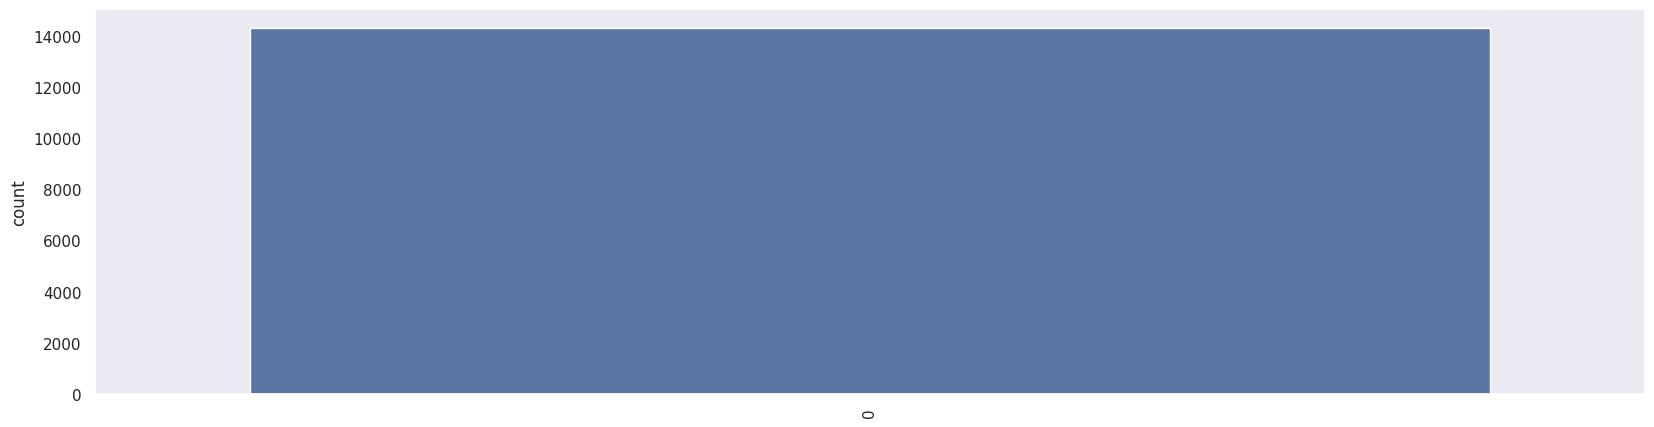

In [30]:
plt.figure(figsize=(20,5))
sns.set(style='dark')
sns.countplot(myntra_df['price'].sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='avg_rating', ylabel='Count'>

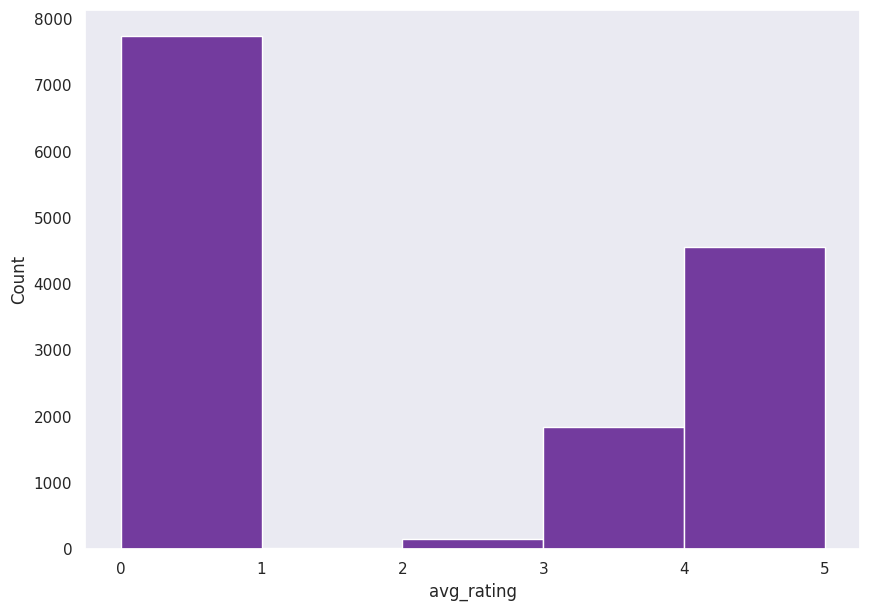

In [31]:
plt.figure(figsize=(10,7))
sns.set(style='dark')
sns.histplot(data=myntra_df,x='avg_rating',color='indigo',binwidth=1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

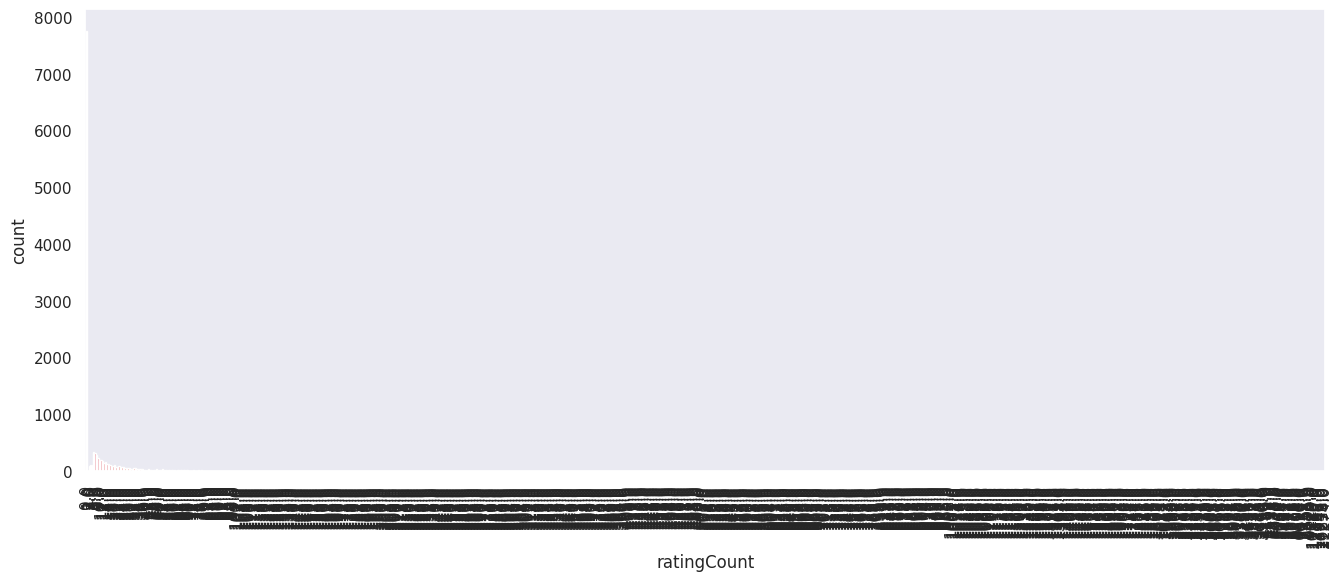

In [32]:
 plt.figure(figsize=(16, 6))
plot = sns.countplot(x='ratingCount', data=myntra_df);
plt.xticks(rotation = 90)

In [33]:
my=myntra_df.loc[ myntra_df.colour=='Black']

In [35]:
my

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."
18,18,14376546.0,Anouk Women Black & Orange Bandhani Printed Kurta,1699.0,Black,Anouk,http://assets.myntassets.com/assets/images/143...,1086.0,4.370166,<ul><li>Colour: black and orange</li><li>Bandh...,"{'Body Shape ID': '424', 'Body or Garment Size..."
36,36,9438657.0,AASI - HOUSE OF NAYO Women Black & Mustard Yel...,2999.0,Black,AASI - HOUSE OF NAYO,http://assets.myntassets.com/assets/images/943...,5652.0,4.109165,Black and mustard yellow solid kurta with trou...,"{'Body Shape ID': '333,424', 'Body or Garment ..."
61,61,18859760.0,Ahalyaa Women Black Floral Pleated Pure Cotton...,5500.0,Black,Ahalyaa,http://assets.myntassets.com/assets/images/188...,11.0,3.181818,Black solid Kurti with Trousers<br><br><b>Kurt...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
...,...,...,...,...,...,...,...,...,...,...,...
14290,950,15212914.0,The Dry State Women Black Skeleton Print Sweat...,2799.0,Black,The Dry State,http://assets.myntassets.com/assets/images/152...,0.0,0.000000,"Black printed sweatshirt has a high neck, lon...","{'Body Shape ID': '324', 'Body or Garment Size..."
14304,964,16994536.0,LYKKEIN Women Black Hooded Sweatshirt,1360.0,Black,LYKKEIN,http://assets.myntassets.com/assets/images/169...,0.0,0.000000,"Black solid sweatshirt has a hooded, na pocke...","{'Body Shape ID': '424', 'Body or Garment Size..."
14305,965,7275903.0,Belle Fille Women Black Solid Sweatshirt,1699.0,Black,Belle Fille,http://assets.myntassets.com/assets/images/727...,13.0,3.846154,"Black solid sweatshirt, has a round neck, long...","{'Body Shape ID': '443,424,324', 'Body or Garm..."
14313,973,16044104.0,SASSAFRAS Women Black Printed Sweatshirt,1799.0,Black,SASSAFRAS,http://assets.myntassets.com/assets/images/160...,19.0,4.105263,"Black printed sweatshirt has a round neck, lo...","{'Body Shape ID': '443,424,324', 'Body or Garm..."


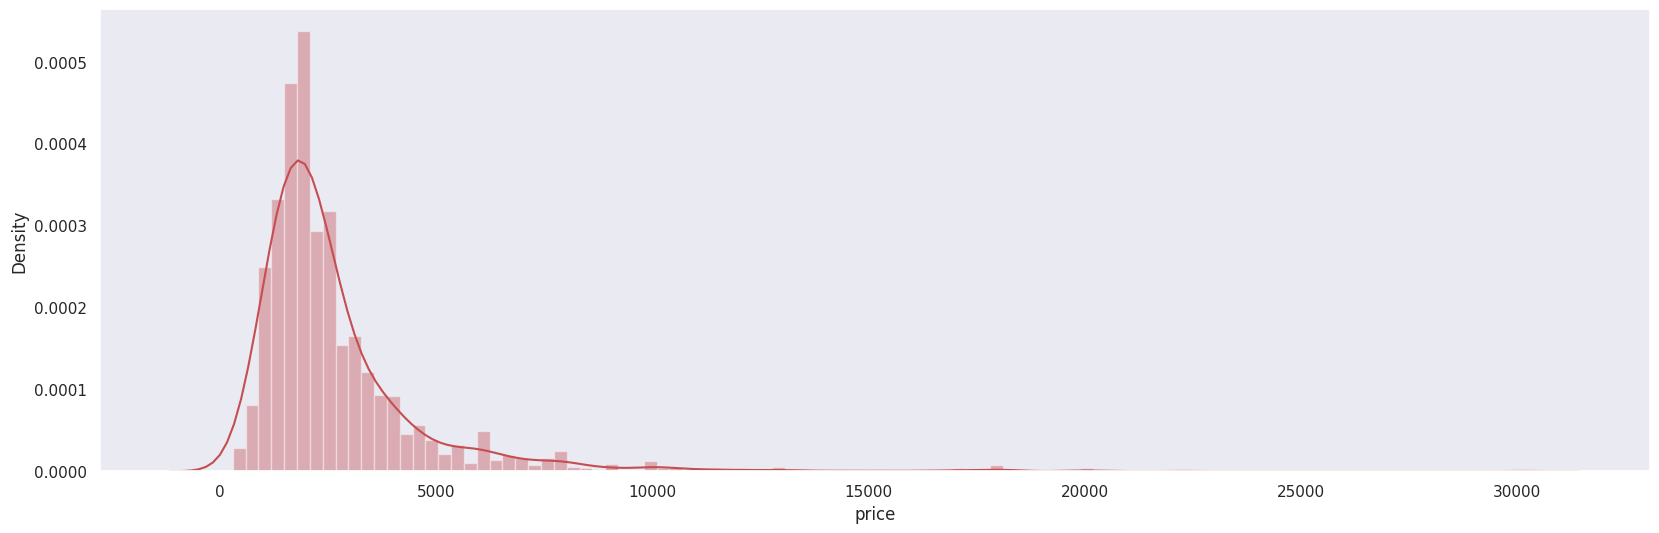

In [36]:
plt.figure(figsize=(20, 6))
plot = sns.distplot(my['price'], color='r', bins=100)

## **Bivariate / Multivariate Analysis.**

---
This type of data involves two different variables. The analysis of this type of data deals with causes and relationships and the analysis is done to find out the relationship among the two variables.Example of bivariate data can be profit and state




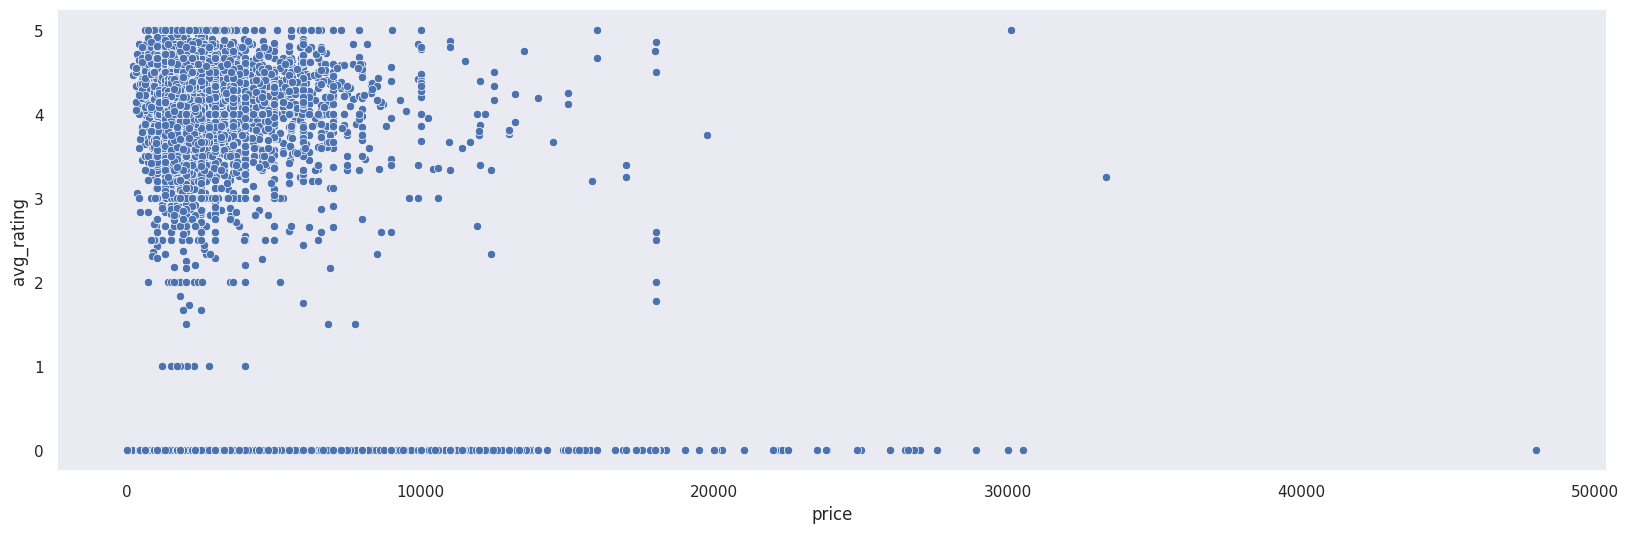

In [39]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=myntra_df.price, y=myntra_df.avg_rating);

In [40]:
correlations = myntra_df.corr()

<Axes: >

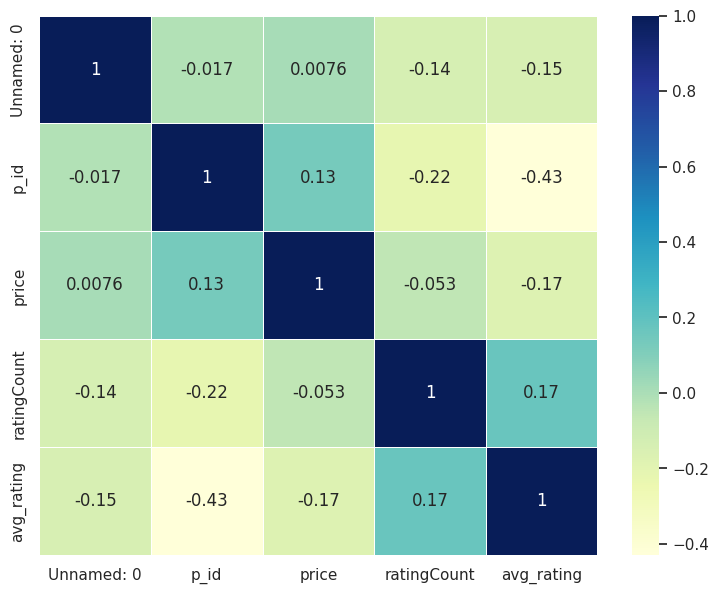

In [41]:
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", linewidths=.5)

In [42]:
Top = myntra_df.nlargest(10, 'price')
Top

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
10188,338,10898748.0,MOKSHA DESIGNS Maroon & Pink Embroidered Ready...,47999.0,Maroon,MOKSHA DESIGNS,http://assets.myntassets.com/assets/images/pro...,0.0,0.00,"Maroon lehenga choli<br>Maroon blouse, three-q...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Vel..."
10213,363,15721148.0,Readiprint Fashions Magenta Embroidered Semi-S...,33350.0,Magenta,Readiprint Fashions,http://assets.myntassets.com/assets/images/157...,4.0,3.25,Magenta embroidered lehenga choli with dupatta...,"{'Blouse Closure': 'NA', 'Blouse Fabric': 'Raw..."
10218,368,18536426.0,Readiprint Fashions Blue & Golden Embroidered ...,30500.0,Blue,Readiprint Fashions,http://assets.myntassets.com/assets/images/185...,0.0,0.00,Blue and golden embroidered lehenga choli with...,"{'Blouse Closure': 'NA', 'Blouse Fabric': 'Art..."
10191,341,11411284.0,Shaily Off-White & Pink Embroidered Semi-Stitc...,30090.0,Off White,Shaily,http://assets.myntassets.com/assets/images/114...,5.0,5.00,"Off-White lehenga choli with dupatta, has thre...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Pol..."
7220,440,16920512.0,Masaba Women White & Rose Gold Floral Foil Pri...,30000.0,White,Masaba,http://assets.myntassets.com/assets/images/169...,0.0,0.00,"This co-ords set consists of a top, trouser, a...","{'Add-Ons': 'NA', 'Better Cotton Initiative': ..."
7287,507,16920516.0,Masaba Woman Black Tulip Cape Set,30000.0,Black,Masaba,http://assets.myntassets.com/assets/images/169...,0.0,0.00,V-neckline&nbsp;<br>Full sleeves&nbsp;<br>Embr...,"{'Add-Ons': 'NA', 'Better Cotton Initiative': ..."
10269,419,18839148.0,Readiprint Fashions Brown Embroidered Thread W...,30000.0,Brown,Readiprint Fashions,http://assets.myntassets.com/assets/images/188...,0.0,0.00,"Brown embroidered lehenga choli with dupatta, ...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Net..."
12516,686,16491504.0,Woods Women Peach-Coloured Water Resistant Lea...,29995.0,Peach,Woods,http://assets.myntassets.com/assets/images/164...,0.0,0.00,Peach-coloured solid water resistant leather j...,"{'Add-Ons': 'NA', 'Body Shape ID': '324,333,42..."
10324,474,16855282.0,Readiprint Fashions Teal Green & Pink Embroide...,28900.0,Teal,Readiprint Fashions,http://assets.myntassets.com/assets/images/168...,0.0,0.00,Teal green and pink embroidered lehenga choli ...,"{'Blouse Closure': 'NA', 'Blouse Fabric': 'Vel..."
10261,411,13525948.0,NAKKASHI Blue & Peach-Coloured Embroidered Sem...,27589.0,Blue,NAKKASHI,http://assets.myntassets.com/assets/images/pro...,0.0,0.00,"Blue lehenga choli with dupatta, has zari<br>...","{'Blouse Closure': 'NA', 'Blouse Fabric': 'Raw..."


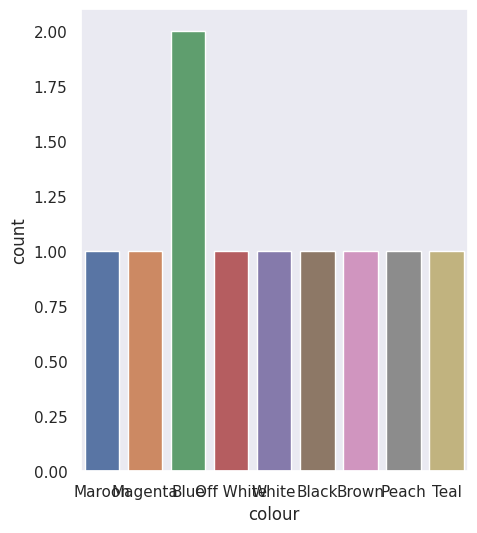

In [43]:
plt.figure(figsize=(5, 6))
plot = sns.countplot(x='colour', data=Top)